## HOUSE PRICING MODEL

Description:

A simple yet challenging project, to predict the housing price based on certain factors like house area, bedrooms, furnished, nearness to mainroad, etc. The dataset is small yet, it is complexity arises due to the fact that it has strong multicollinearity. To know more about the project, see - https://www.kaggle.com/datasets/yasserh/housing-prices-dataset/data

### Import Libraries

The import libraries section in a machine learning (ML) project typically involves importing all the necessary libraries and modules used throughout the project for tasks such as data manipulation, preprocessing, model building, evaluation, and visualization.

In [1]:
#!pip install catboost

  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/35/7e/35fa1a7cf6925ff438e849cca50c88b8d28e02d9c3486442f2f85b86184a/catboost-1.2.5-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/00/be/d59db2d1d52697c6adc9eacaf50e8965b6345cc143f671e1ed068818d5cf/graphviz-0.20.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB 325.1 kB/s eta 0:05:11
   ---------------------------------------- 0.1/101.1 MB 544.7 kB/s eta 0:03:06
   ---------------------------------------- 0.2/101.1 MB 1.1 MB/s eta 0:01:29
   ---------------------------------------- 0.4/101.1 MB 2.2 MB/s eta 0:00:46
   ---------------------------------------- 0.7/101.1 MB 3.1 MB/s eta 0:00:33
   ---------------------------------------- 1.0/101.

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

### Read Data into Notebook

In this section of this machine learning (ML) project, my primary focus is to use the Pandas library to import, load, and organize the dataset into a format that is suitable for analysis and modeling.

In [4]:
house_price = pd.read_csv('Housing.csv')

In [5]:
house_price.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


### Data Cleaning

Data cleaning in machine learning (ML) refers to the process of identifying and correcting errors, inconsistencies, and missing values in a dataset to prepare it for analysis and modeling

##### Check blank (Null) values in the Dataset

As part of the data cleaning process, in this section, I perform a task to check for null values in the dataset. This is a crucial step to ensure data quality and to prepare the data for further analysis and modeling. Since there is no null value observed below, there is no need to remove or replace any null values.

In [6]:
house_price.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

##### Verify Data types

As part of the data cleaning task, in this section, I use the .dtypes attribute method to quickly inspect the data types of all columns in the DataFrame. This information serves as a crucial foundation for effective data cleaning and preprocessing before building machine learning models.

In [7]:
house_price.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

##### Mapping 

As part of the data cleaning process, in this section, I use mapping to convert object datatype columns observed above into integers. Using mapping for such a task is a common technique in data cleaning before building machine learning models. This process involves mapping each unique category or label in a categorical column to a corresponding integer value.

In [8]:
# Define mappings for each categorical column
mappings = {
    'mainroad': {'yes': 1, 'no': 0},
    'guestroom': {'yes': 1, 'no': 0},
    'basement': {'yes': 1, 'no': 0},
    'hotwaterheating': {'yes': 1, 'no': 0},
    'airconditioning': {'yes': 1, 'no': 0},
    'prefarea': {'yes': 1, 'no': 0}
}
 
# Apply mappings to each column
for col, mapping in mappings.items():
   house_price[col] =house_price[col].map(mapping)


In [9]:
house_price.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished


##### Label Encoding

As part of the data cleaning procedure, in this section, i used label encoding as a technique to convert categorical data represented as strings or objects into numerical values. This process assigns a unique integer to each category, essentially encoding the categories into integers. This transformation is commonly used as part of the data-cleaning process before building machine learning models. Here I changed the column  "furnishingstatus" contents into 0, 1, and 2 in order of importance... 

- furnished == 2
- semi-furnished == 1
- unfurnished == 0

In [10]:
house_price['furnishingstatus'] = [0 if status == 'unfurnished' else 1 if status == 'semi-furnished' else 2 for status in house_price['furnishingstatus']]

In [11]:
house_price.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1


### Statistical Analysis of the Dataset

In this section, I perform a statistical analysis using the describe() function. This is a crucial step in understanding the characteristics and properties of the dataset.

In [12]:
house_price.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.930275
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


### Visualization - To see the relationship between our variables

In the visualization section of this machine learning project, I used a heatmap to depict the correlation between the target variable and all other features in the dataset, aiding in understanding data distribution and feature relevance. I also used a pair plot to visualize different plots of the entire columns

##### Plot of correlation (Heatmap) - To visualize the overall correlation between target and all other variables

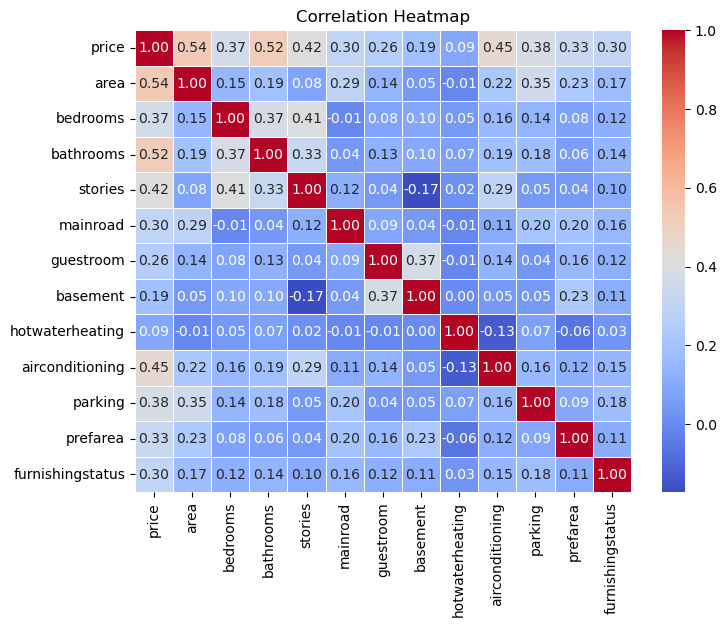

In [13]:
# Calculate the correlation matrix
correlation_matrix = house_price.corr()
 
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
 
#Save the image below
plt.savefig("Correlation Heatmap.png",dpi = 300,bbox_inches ="tight")

plt.show();

##### Plot of relationships (Pair plots) - To visualize the entire relationships between each of the variables

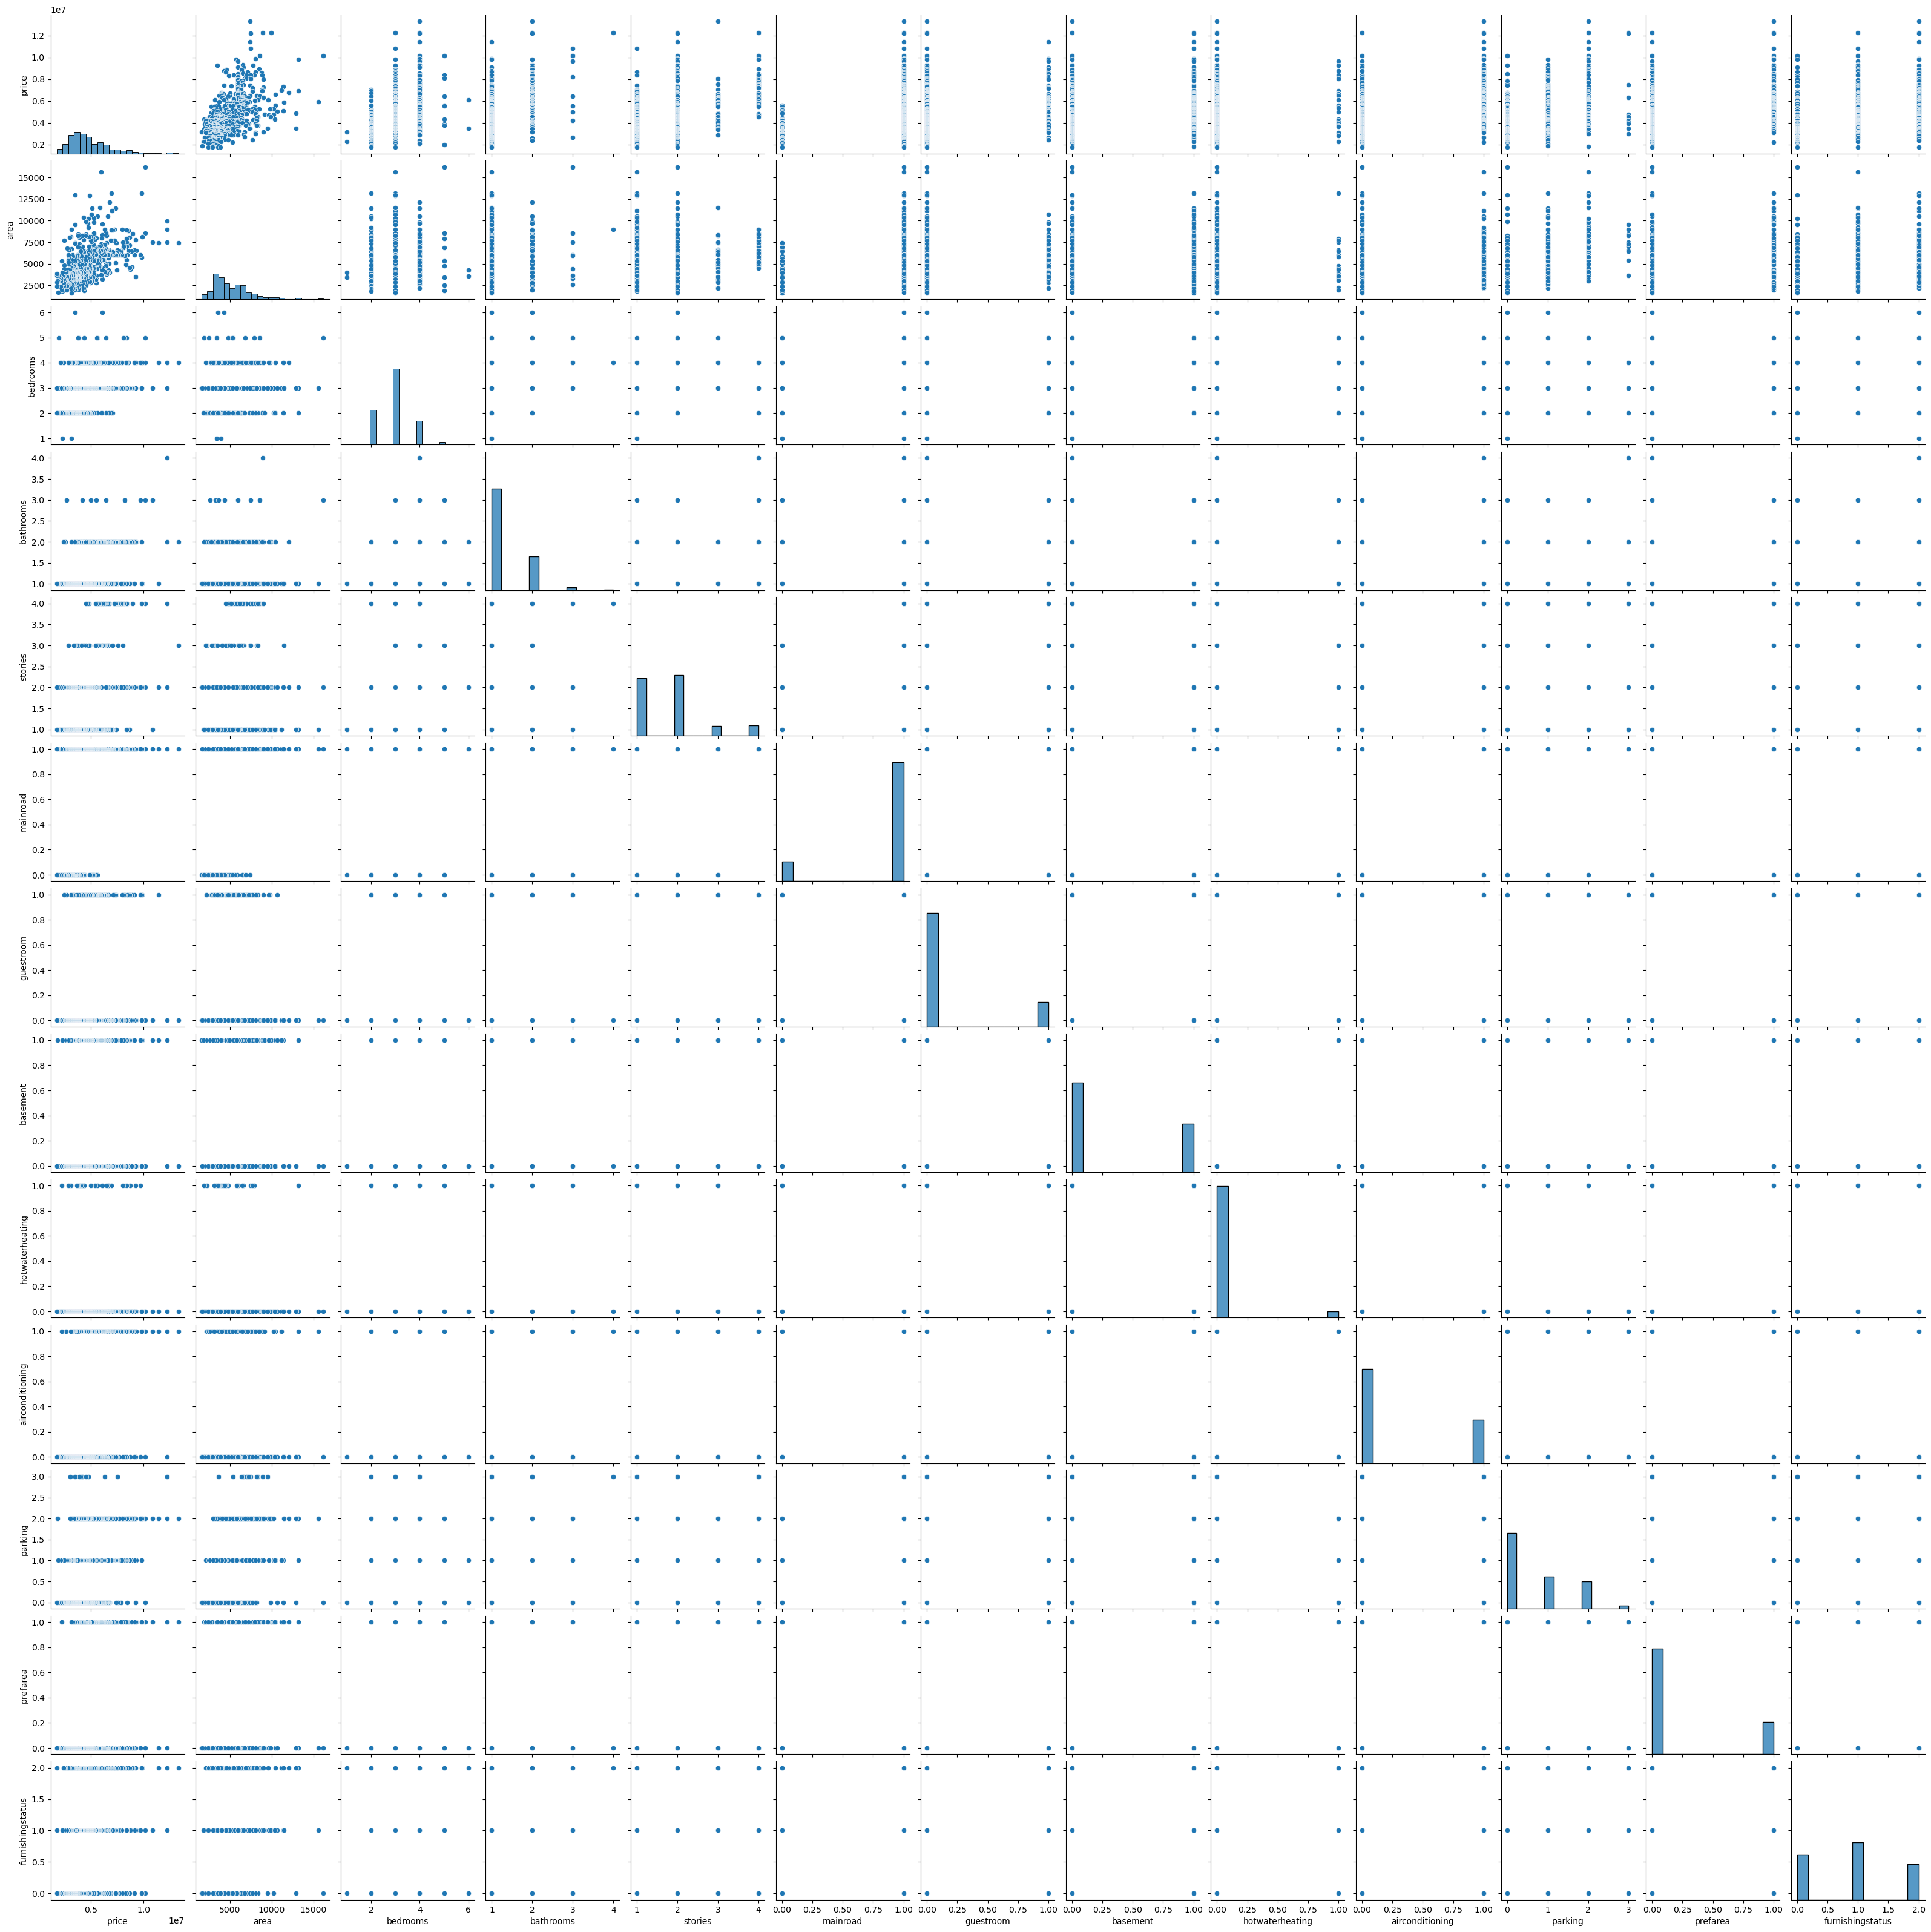

In [14]:
sns.pairplot(house_price)
plt.show()

### Defining X and y 

In this section, I divided the dataset into X and y. As per standard, when building a machine learning model, one of the initial steps is to divide the dataset into two main components: the feature matrix (often denoted as X) and the target variable (often denoted as y).

In [15]:
X = house_price.drop('price', axis = 1)
y = house_price['price']

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
46,6000,3,2,4,1,0,0,0,1,1,0,2
93,7200,3,2,1,1,0,1,0,1,3,0,1
335,3816,2,1,1,1,0,1,0,1,2,0,2
412,2610,3,1,2,1,0,1,0,0,0,1,0
471,3750,3,1,2,1,0,0,0,0,0,0,0


In [17]:
# # Identify numerical columns
numerical_cols = ['area','bedrooms','bathrooms', 'stories', 'parking', 'furnishingstatus']

# # Initialize the StandardScaler
scaler = StandardScaler()

# # Fit and transform the numerical columns in the training set
X_train_scaled = X_train.copy()
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# # Transform the numerical columns in the test set
X_test_scaled = X_test.copy()
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [18]:
X_train_scaled.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
46,0.384168,0.055271,1.539173,2.587644,1,0,0,0,1,0.367957,0,1.409401
93,0.929181,0.055271,1.539173,-0.912499,1,0,1,0,1,2.709987,0,0.079317
335,-0.607755,-1.283514,-0.557950,-0.912499,1,0,1,0,1,1.538972,0,1.409401
412,-1.155492,0.055271,-0.557950,0.254215,1,0,1,0,0,-0.803059,1,-1.250768
471,-0.637730,0.055271,-0.557950,0.254215,1,0,0,0,0,-0.803059,0,-1.250768


In [19]:
X_test_scaled.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
316,0.338750,1.394055,1.539173,0.254215,0,0,1,0,0,0.367957,0,-1.250768
77,0.611257,0.055271,1.539173,1.420929,1,0,0,0,1,-0.803059,1,1.409401
360,-0.506019,-1.283514,-0.557950,-0.912499,1,0,0,0,0,-0.803059,0,0.079317
90,-0.070009,0.055271,-0.557950,0.254215,1,0,0,0,1,-0.803059,0,0.079317
493,-0.542353,0.055271,-0.557950,-0.912499,1,0,0,0,0,-0.803059,0,1.409401


### Building Our Model...
For this project, two different four different models will be considered using different algorithms and the model with the best result will be regarded as the final model. The two models are:
- Linear Regression 
- RandomforestRegressor
- Catboost
- XGboost 

#### Define Function to Evaluate the performance of the model

In this part, I created a function that helps me quickly check how well my model works. I'll try three different methods - Linear Regression, RandomforestRegressor, Catboost, Xgboost - to see which one works best for this project. This function saves me time because I won't have to write the same code multiple times.

In [20]:
def evaluate_preds(y_true,y_preds):
    '''
    Perform evaluation comparison on y_true labels vs y_pred labels on a Regression
    '''
    r2 = r2_score(y_true,y_preds) 
    mae = mean_absolute_error(y_true,y_preds)
    mse = mean_squared_error(y_true,y_preds)
    metric_dict = {'R Squared':round(r2,2),
                  "Mean Absolute Error":round(mae,2),
                  "Mean Squared Error":round(mse,2)}
    #print(f"R Squared:{r2 * 100:.2f}%")
    #print(f"Mean absolute Error:{mae:.2f}")
    #print(f"Mean Squared Error:{mse:.2f}")
          
    return metric_dict 

#### Linear Regression

Linear regression is a fundamental supervised learning algorithm used for predictive modeling in machine learning. Linear regression is a simple yet powerful algorithm that serves as the foundation for more complex models and techniques in machine learning.

In [21]:
np.random.seed(42)
 
#Define model
Lr_model = LinearRegression()
 
#Fit model
Lr_model.fit(X_train_scaled, y_train)

LinearRegression()

##### Evaluate Linear Regression

In [22]:
# To predict y using the trained model
y_preds = Lr_model.predict(X_test_scaled)

# To compare the true value of y to the predicted values
lr_baseline = evaluate_preds(y_test,y_preds)

lr_baseline

{'R Squared': 0.65,
 'Mean Absolute Error': 979679.69,
 'Mean Squared Error': 1771751116594.04}

##### Analysis of result

The linear regression model has a reasonably good fit with an 𝑅2 value of 0.65, indicating a substantial explanation of variance. However, the MAE of $979,679.69 and MSE of 1,771,751,116,594.04 indicate that the model's predictions still have significant errors, particularly in terms of absolute magnitude (MAE) and squared magnitude (MSE). Further refinement through tuning may help to reduce prediction errors

#### Random Forest Regressor

Random Forest Regressor is a popular supervised learning algorithm used for regression tasks in machine learning. It belongs to the ensemble learning category, specifically the bagging method, and is based on the concept of decision trees.

In [23]:
np.random.seed(42)
 
#Creating a Random forest model
Rf_model =RandomForestRegressor()
 
#fit the model
Rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor()

##### Evaluate Random Forest Regressor

In [24]:
# To predict y using the trained model
y_preds_2 = Rf_model.predict(X_test_scaled)

# To compare the true value of y to the predicted values
Rf_baseline = evaluate_preds(y_test,y_preds_2)

Rf_baseline

{'R Squared': 0.61,
 'Mean Absolute Error': 1024146.54,
 'Mean Squared Error': 1955666037578.72}

##### Analysis of result

The Random Forest Regressor model achieved an R-squared value of 0.61, indicating that approximately 61% of the variance in the target variable is explained by the model. Additionally, the model has a Mean Absolute Error of approximately $1,024,081.03 and a Mean Squared Error of approximately 1,956,925,181,711.52, suggesting moderate predictive performance with some room for improvement, particularly in reducing the absolute and squared errors. This will be achieved through tuning just like the above model.

### Catboost

In [25]:
np.random.seed(42)

# Initialize the CatBoost regression model
model_cat = CatBoostRegressor(verbose=0)

# Train the model
model_cat.fit(X_train_scaled, y_train)

In [26]:
# Make predictions
y_pred3 = model_cat.predict(X_test_scaled)

Cat_Nor = evaluate_preds(y_test,y_pred3)
Cat_Nor 

{'R Squared': 0.65,
 'Mean Absolute Error': 977678.41,
 'Mean Squared Error': 1779690114983.82}

### XGboost

In [27]:
np.random.seed(42)

# Initialize the Random Forest regression model
model_xgb = XGBRegressor()

# Train the model
model_xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [28]:
# Make predictions
y_pred4 = model_xgb.predict(X_test_scaled)

Xgb_Nor = evaluate_preds(y_test,y_pred4)
Xgb_Nor 

{'R Squared': 0.6,
 'Mean Absolute Error': 1062315.99,
 'Mean Squared Error': 2032404618961.44}

### Tuning Our Model (Hypreparameters)

Model tuning, also known as hyperparameter tuning, is the process of finding the optimal hyperparameters for a machine learning model to improve its performance. Grid search is a popular technique for model tuning that systematically searches through a predefined grid of hyperparameters to find the combination that yields the best performance.

#### Linear Regression

In [29]:
np.random.seed(42)

# Define the grid of parameters
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

# Define the model
Lr_model_2 = LinearRegression()

# Setup GridSearchCV
gs_Lr_model_2 = GridSearchCV(Lr_model_2, param_grid=param_grid, cv=5)

# Fit GridSearchCV
gs_Lr_model_2.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False]})

In [30]:
# To see the best parameter combination
gs_Lr_model_2.best_params_

{'copy_X': True, 'fit_intercept': True}

##### Evaluate Tuned Linear Regression

In [31]:
# To predict y using the trained model
y_preds_5 = gs_Lr_model_2.predict(X_test_scaled)

# To compare the true value of y to the predicted values
Gs_Lr = evaluate_preds(y_test,y_preds_5)

Gs_Lr

{'R Squared': 0.65,
 'Mean Absolute Error': 979679.69,
 'Mean Squared Error': 1771751116594.04}

##### Analysis of tuned results

As seen in the results, it is obvious that tuning this model hasn't worked well when we compared results to the untuned model. The untuned model performs slightly better than the tuned model. This is not strange though with Linear Regression. Tuning a linear regression model doesn't always lead to significant improvements because of its inherent simplicity. Linear regression operates under the assumption of a linear relationship between the independent and dependent variables, which might not accurately capture the complexities of real-world data. I will try to tune this model by shuffling the dataset to see if there will be any significant improvement.

#### Random Forest Regressor

In [32]:
grid_2 = {'max_depth': [None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [6],
 'n_estimators': [100, 200, 500]}

In [33]:
np.random.seed(42)
 
#Define model
Rf_model_2 = RandomForestRegressor(n_jobs = -1)

# Setup GridSearchCV
gs_Rf_model_2 = GridSearchCV(estimator = Rf_model_2,
                    param_grid = grid_2,
                    cv = 5,
                    verbose = 2)
#Fit GridSearch model
gs_Rf_model_2.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [34]:
# To see the best parameter combination
gs_Rf_model_2.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 200}

##### Evaluate Tuned Random Forest Regressor

In [35]:
# To predict y using the trained model
y_preds_6 = gs_Rf_model_2.predict(X_test_scaled)

# To compare the true value of y to the predicted values
Gs_Rf = evaluate_preds(y_test,y_preds_6)

Gs_Rf

{'R Squared': 0.61,
 'Mean Absolute Error': 1031196.31,
 'Mean Squared Error': 1956018871005.14}

##### Analysis of tuned results

As seen in the results, it is obvious that tuning this model hasn't worked well when we compared results to the untuned model. This is a very common problem in a situation whereby the dataset has a very small data size. The size of the data can indeed be a factor influencing the performance of the tuned random forest regressor compared to the untuned one. Random forests typically excel when provided with large datasets because they can harness the power of many individual decision trees to generalize well and make accurate predictions. I will try to tune this model by shuffling the dataset to see if there will be any significant improvement.

### Catboost

In [36]:
np.random.seed(42)

# Define the CatBoost Regressor
model_cat_2 = CatBoostRegressor()

# Define the parameters grid for GridSearchCV
param_grid = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8],
    'learning_rate': [0.03, 0.1, 0.3],
    'l2_leaf_reg': [1, 3, 5],
}

# Perform GridSearchCV
Gs_model_cat_2 = GridSearchCV(estimator=model_cat_2, 
                           param_grid=param_grid, 
                           cv=3,n_jobs=-1)

# Fit the GridSearchCV with X_train_scaled, y_train
Gs_model_cat_2.fit(X_train_scaled, y_train)

0:	learn: 1666240.9557845	total: 1.26ms	remaining: 125ms
1:	learn: 1592711.4545188	total: 2.75ms	remaining: 135ms
2:	learn: 1526241.8039897	total: 4.39ms	remaining: 142ms
3:	learn: 1471588.8442220	total: 5.61ms	remaining: 135ms
4:	learn: 1423628.9828148	total: 6.61ms	remaining: 126ms
5:	learn: 1370128.5049932	total: 7.69ms	remaining: 120ms
6:	learn: 1327257.9035290	total: 9.56ms	remaining: 127ms
7:	learn: 1285772.7694553	total: 10.6ms	remaining: 122ms
8:	learn: 1249482.0817934	total: 11.7ms	remaining: 118ms
9:	learn: 1217241.4342828	total: 12.5ms	remaining: 112ms
10:	learn: 1190770.8772095	total: 13.5ms	remaining: 109ms
11:	learn: 1165052.5838588	total: 14.4ms	remaining: 106ms
12:	learn: 1143981.6550018	total: 15.2ms	remaining: 102ms
13:	learn: 1122690.0406847	total: 15.8ms	remaining: 97.4ms
14:	learn: 1107967.5880663	total: 17ms	remaining: 96.1ms
15:	learn: 1092086.5247772	total: 17.9ms	remaining: 94.1ms
16:	learn: 1074905.2700913	total: 18.8ms	remaining: 91.6ms
17:	learn: 1058278.126

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x00000279EE179B90>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8], 'iterations': [100, 200, 300],
                         'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.03, 0.1, 0.3]})

In [37]:
# Get the best parameters and best score
best_params = Gs_model_cat_2.best_params_

# Train CatBoost model with best parameters
best_catboost = CatBoostRegressor(**best_params)
best_catboost.fit(X_train_scaled, y_train)

0:	learn: 1666240.9557845	total: 1.29ms	remaining: 128ms
1:	learn: 1592711.4545188	total: 2.46ms	remaining: 121ms
2:	learn: 1526241.8039897	total: 3.56ms	remaining: 115ms
3:	learn: 1471588.8442220	total: 4.71ms	remaining: 113ms
4:	learn: 1423628.9828148	total: 5.79ms	remaining: 110ms
5:	learn: 1370128.5049932	total: 6.88ms	remaining: 108ms
6:	learn: 1327257.9035290	total: 7.93ms	remaining: 105ms
7:	learn: 1285772.7694553	total: 9.31ms	remaining: 107ms
8:	learn: 1249482.0817934	total: 10.5ms	remaining: 107ms
9:	learn: 1217241.4342828	total: 11.7ms	remaining: 105ms
10:	learn: 1190770.8772095	total: 12.8ms	remaining: 104ms
11:	learn: 1165052.5838588	total: 13.9ms	remaining: 102ms
12:	learn: 1143981.6550018	total: 15ms	remaining: 100ms
13:	learn: 1122690.0406847	total: 16ms	remaining: 98.4ms
14:	learn: 1107967.5880663	total: 17.2ms	remaining: 97.2ms
15:	learn: 1092086.5247772	total: 18.3ms	remaining: 95.9ms
16:	learn: 1074905.2700913	total: 19.4ms	remaining: 94.5ms
17:	learn: 1058278.12653

In [38]:
# Make predictions
y_pred7 = best_catboost.predict(X_test_scaled)

Cat_Gs = evaluate_preds(y_test,y_pred7)
Cat_Gs

{'R Squared': 0.65,
 'Mean Absolute Error': 969526.67,
 'Mean Squared Error': 1777362716259.11}

### XGboost

In [39]:
np.random.seed(42)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 4, 5]
}

# Define XGBoost Regressor model
xgb_model_2 = XGBRegressor(n_jobs = -1)

# Initialize GridSearchCV
gs_xgb_model_2 = GridSearchCV(estimator=xgb_model_2, 
                           param_grid=param_grid, 
                           cv=5, verbose = 2)

# Fit GridSearchCV to training data
gs_xgb_model_2.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=300; total time=   0.4s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=300; total time=   0.8s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=300; total time=   0.4s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=300; total time=   0.4s
[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=200; total time=   0.3s
[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=200; total time=   0.3s
[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=200; total time=   0.3s
[CV] END ..learning_rate=0.0

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=-1, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.05],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [40]:
# To see the best parameter combination
gs_xgb_model_2.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}

In [41]:
# Make predictions
y_pred8 = gs_xgb_model_2.predict(X_test_scaled)

Xgb_Gs = evaluate_preds(y_test,y_pred8)
Xgb_Gs

{'R Squared': 0.65,
 'Mean Absolute Error': 988841.74,
 'Mean Squared Error': 1789758795417.69}

### Using shuffled data

Shuffling small datasets before splitting can improve the results of regression models by reducing bias and variance in the data. When data points are ordered or grouped in a specific way, it can introduce patterns or biases that affect the performance of the model. Shuffling the dataset randomly before splitting ensures that the data points are mixed up, making it less likely for the model to pick up on any spurious patterns or biases during training. This can lead to a more representative training set, which in turn can improve the model's ability to generalize to unseen data and produce more reliable predictions.

In [42]:
np.random.seed(42)

house_price_shuffled = house_price.sample(frac = 1)

In [43]:
house_price_shuffled.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
316,4060000,5900,4,2,2,0,0,1,0,0,1,0,0
77,6650000,6500,3,2,3,1,0,0,0,1,0,1,2
360,3710000,4040,2,1,1,1,0,0,0,0,0,0,1


In [44]:
X = house_price_shuffled.drop('price', axis = 1)
y = house_price_shuffled['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [45]:
# # Identify numerical columns
numerical_cols = ['area','bedrooms','bathrooms', 'stories', 'parking', 'furnishingstatus']

# # Initialize the StandardScaler
scaler = StandardScaler()

# # Fit and transform the numerical columns in the training set
X_train_scaled_shu = X_train.copy()
X_train_scaled_shu[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# # Transform the numerical columns in the test set
X_test_scaled_shu = X_test.copy()
X_test_scaled_shu[numerical_cols] = scaler.transform(X_test[numerical_cols])

#### Linear Regression

In [46]:
np.random.seed(42)

param_grid = {'fit_intercept': [True, False],
              'copy_X': [True, False]}
 
#Define model
Lr_model_3 = LinearRegression()

# Setup GridSearchCV
gs_Lr_model_3 = GridSearchCV(Lr_model_3, param_grid= param_grid, cv=5)
 
#Fit GridSearch model
gs_Lr_model_3.fit(X_train_scaled_shu, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False]})

In [47]:
gs_Lr_model_3.best_params_

{'copy_X': True, 'fit_intercept': True}

##### Evaluate shuffled Linear Regression

In [48]:
# To predict y using the trained model
y_preds_9 = gs_Lr_model_3.predict(X_test_scaled_shu)

# To compare the true value of y to the predicted values
Gs_Lr_Shuffled = evaluate_preds(y_test,y_preds_9)

Gs_Lr_Shuffled

{'R Squared': 0.74,
 'Mean Absolute Error': 757451.43,
 'Mean Squared Error': 1163961383617.87}

##### Analysis of the shuffled results

Amazing! Shuffling the dataset before splitting improves the linear regression model's performance, resulting in higher R-squared value, lower Mean Absolute Error, and lower Mean Squared Error compared to the unshuffled dataset, indicating better explanatory power and predictive accuracy.

#### Random Forest Regressor

In [49]:
np.random.seed(42)
 
#Define model
Rf_model_3 = RandomForestRegressor(n_jobs = -1)

# Setup GridSearchCV
gs_Rf_model_3 = GridSearchCV(estimator = Rf_model_3,
                    param_grid = grid_2,
                    cv = 5,
                    verbose = 2)
#Fit GridSearch model
gs_Rf_model_3.fit(X_train_scaled_shu, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [50]:
# To see the best parameter combination
gs_Rf_model_3.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 200}

##### Evaluate shuffled Random Forest Regressor

In [51]:
# To predict y using the trained model
y_preds_10 = gs_Rf_model_3.predict(X_test_scaled_shu)

# To compare the true value of y to the predicted values
Gs_Rf_Shuffled = evaluate_preds(y_test,y_preds_10)

Gs_Rf_Shuffled

{'R Squared': 0.69,
 'Mean Absolute Error': 762909.57,
 'Mean Squared Error': 1399430590426.94}

#### Analysis of the shuffled results

Amazing! The Random Forest Regressor trained on the shuffled dataset performs better, showing a higher R-squared value, lower Mean Absolute Error, and lower Mean Squared Error compared to the unshuffled dataset, indicating improved predictive accuracy.

### Catboost

In [52]:
np.random.seed(42)

# Define the CatBoost Regressor
model_cat_2 = CatBoostRegressor()

# Define the parameters grid for GridSearchCV
param_grid = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8],
    'learning_rate': [0.03, 0.1, 0.3],
    'l2_leaf_reg': [1, 3, 5],
}

# Perform GridSearchCV
Gs_model_cat_2 = GridSearchCV(estimator=model_cat_2, 
                           param_grid=param_grid, 
                           cv=3,n_jobs=-1)

# Fit the GridSearchCV with X_train_scaled, y_train
Gs_model_cat_2.fit(X_train_scaled_shu, y_train)

0:	learn: 1585139.3228521	total: 3ms	remaining: 297ms
1:	learn: 1436889.5900046	total: 4.67ms	remaining: 229ms
2:	learn: 1328490.7099642	total: 7.04ms	remaining: 228ms
3:	learn: 1241713.3702882	total: 9.39ms	remaining: 225ms
4:	learn: 1176010.3430343	total: 11.7ms	remaining: 223ms
5:	learn: 1129458.3922639	total: 14.5ms	remaining: 227ms
6:	learn: 1086512.7823992	total: 16.3ms	remaining: 216ms
7:	learn: 1050883.7598465	total: 17.9ms	remaining: 205ms
8:	learn: 1014707.8749381	total: 19.7ms	remaining: 199ms
9:	learn: 998394.0457052	total: 21.5ms	remaining: 194ms
10:	learn: 983055.0042809	total: 23.1ms	remaining: 187ms
11:	learn: 963278.0958311	total: 24.6ms	remaining: 180ms
12:	learn: 948923.9411573	total: 26.5ms	remaining: 177ms
13:	learn: 935519.2669790	total: 28.5ms	remaining: 175ms
14:	learn: 927614.1368656	total: 30.5ms	remaining: 173ms
15:	learn: 912245.0337158	total: 32.5ms	remaining: 171ms
16:	learn: 895513.9834315	total: 34.7ms	remaining: 169ms
17:	learn: 880177.3392572	total: 36

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x00000279DDB3B6D0>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8], 'iterations': [100, 200, 300],
                         'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.03, 0.1, 0.3]})

In [53]:
# To see the best parameter combination
Gs_model_cat_2.best_params_

{'depth': 6, 'iterations': 100, 'l2_leaf_reg': 5, 'learning_rate': 0.3}

In [54]:
# To predict y using the trained model
y_preds_11 = Gs_model_cat_2.predict(X_test_scaled_shu)

# To compare the true value of y to the predicted values
Gs_Ca_Shuffled = evaluate_preds(y_test,y_preds_11)

Gs_Ca_Shuffled

{'R Squared': 0.67,
 'Mean Absolute Error': 796527.35,
 'Mean Squared Error': 1460236085398.86}

### XGboost

In [55]:
np.random.seed(42)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 4, 5]
}

# Define XGBoost Regressor model
xgb_model_2 = XGBRegressor(n_jobs = -1)

# Initialize GridSearchCV
gs_xgb_model_2 = GridSearchCV(estimator=xgb_model_2, 
                           param_grid=param_grid, 
                           cv=5, verbose = 2)

# Fit GridSearchCV to training data
gs_xgb_model_2.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=300; total time=   0.5s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=300; total time=   0.4s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=300; total time=   0.4s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=300; total time=   0.4s
[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=200; total time=   0.4s
[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=200; total time=   0.4s
[CV] END ..learning_rate=0.05, max_depth=4, n_estimators=200; total time=   0.4s
[CV] END ..learning_rate=0.0

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=-1, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.05],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [56]:
# To see the best parameter combination
gs_xgb_model_2.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}

In [57]:
# To predict y using the trained model
y_preds_12 = gs_xgb_model_2.predict(X_test_scaled_shu)

# To compare the true value of y to the predicted values
Gs_Xgb_Shuffled = evaluate_preds(y_test,y_preds_12)

Gs_Xgb_Shuffled

{'R Squared': -0.05,
 'Mean Absolute Error': 1580774.66,
 'Mean Squared Error': 4682232652191.66}

### Compare the outcomes of our models

In [58]:
compare_matrics = pd.DataFrame({'baseline_LR': lr_baseline,
                                'baseline_RF': Rf_baseline,
                                'baseline_Cat': Cat_Nor,
                                'baseline_Xgb': Xgb_Nor,
                                'GridS_LR':Gs_Lr,
                                'GridS_RF': Gs_Rf,
                                'GridS_Cat': Cat_Gs,
                                'GridS_Cat': Xgb_Gs,
                                'Shuffled_LR': Gs_Lr_Shuffled,
                                'Shuffled_RF':Gs_Rf_Shuffled,
                                'Shuffled_Cat':Gs_Ca_Shuffled,
                                'Shuffled_Xgb':Gs_Xgb_Shuffled
                               })
compare_matrics

,baseline_LR,baseline_RF,baseline_Cat,baseline_Xgb,GridS_LR,GridS_RF,GridS_Cat,Shuffled_LR,Shuffled_RF,Shuffled_Cat,Shuffled_Xgb
R Squared,6.500000e-01,6.100000e-01,6.500000e-01,6.000000e-01,6.500000e-01,6.100000e-01,6.500000e-01,7.400000e-01,6.900000e-01,6.700000e-01,-5.000000e-02
Mean Absolute Error,9.796797e+05,1.024147e+06,9.776784e+05,1.062316e+06,9.796797e+05,1.031196e+06,9.888417e+05,7.574514e+05,7.629096e+05,7.965273e+05,1.580775e+06
Mean Squared Error,1.771751e+12,1.955666e+12,1.779690e+12,2.032405e+12,1.771751e+12,1.956019e+12,1.789759e+12,1.163961e+12,1.399431e+12,1.460236e+12,4.682233e+12


### Conclusion

In conclusion, Based on R², Mean Absolute Error (MEA), and Mean Squared Error (MSE), the column "Shuffled_LR" performs the best, as it has the highest R² (0.74), the lowest MEA (757,451), and the lowest MSE (1.16e+12).

### Save

In [59]:
#save an existing model to file
pickle.dump(gs_Lr_model_3, open('shuffled_gride_search_linear_regression_model_3.pkl', 'wb'))